## XGBoost: Extreme Gradient Boosting

XGBoost is a supervised machine learning algorithm based on gradient-boosted decision trees. It was introduced by Tianqi Chen in 2014 and quickly became one of the most widely used predictive models in applied statistics and data science because it is fast, accurate, and easy to tune.

### How the model works (conceptually)

XGBoost fits an **ensemble of decision trees** one at a time. Each tree is built to correct the mistakes of the trees that came before it. To do this, XGBoost uses the following ideas:

- **Gradient boosting:** After each prediction, the model computes the gradient of the loss function (for example, squared error for regression or logistic loss for classification). The next tree is trained to predict these gradients—i.e., the direction in which the model needs to adjust to reduce error.
- **Second-order information:** Unlike basic gradient boosting, XGBoost also uses the **Hessian** (second derivative of the loss), which allows it to take more stable, informed steps during optimization.
- **Regularization:** The algorithm penalizes overly complex trees using $L_1$ and $L_2$ penalties. This keeps the trees small and prevents overfitting, which is crucial for generalization.

This process is visualized below:


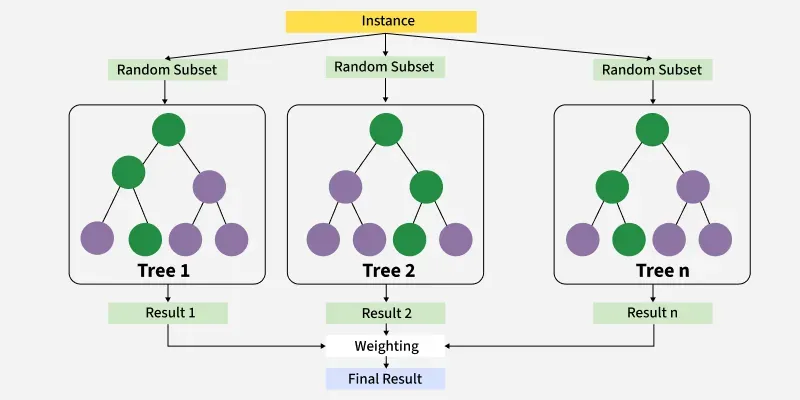

### What the model outputs

When you fit XGBoost, you typically obtain:

- **Predicted values** (numeric predictions for regression; class probabilities or labels for classification)
- **Feature importance scores**, indicating which variables contributed most to the model
- **Training history**, including the loss at each boosting round
- **The fitted ensemble of trees**, which the library stores internally

These outputs allow you to both evaluate performance and understand how the model behaves.

### Why XGBoost is widely used

- Handles non-linear relationships automatically  
- Includes built-in regularization to reduce overfitting  
- Efficient on medium and large tabular datasets  
- Works with missing values and mixed variable types  
- Straightforward to implement in Python or R using standard packages  

Overall, XGBoost provides a statistically principled, computationally efficient way to build high-performing predictive models. The combination of gradient boosting, tree-based structure, and careful regularization makes it an excellent algorithm for anybody to understand and apply.

### Implementation 

In this project, XGBoost is used as a multi-class classifier to predict is flower species using four numerical features:
- Sepal Length (SepalLengthCm)
- Sepal Width (SepalWidthCm)
- Petal Length (PetalLengthCm)
- Petal Width (PetalWidthCm)

The categorical species labels are first converted into numeric form (0, 1, 2), and the model is trained using a softmax-based multi-class classification objective.

In [14]:
# Import dependencies
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

In [15]:
# Read in Iris dataset
data = 'data/Iris.csv'
df = pd.read_csv(data, index_col=0)

# Display basic information about the dataset
print("Dataset shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nClass distribution:")
print(df['Species'].value_counts())

Dataset shape: (150, 5)

First few rows:
    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
Id                                                                       
1             5.1           3.5            1.4           0.2  Iris-setosa
2             4.9           3.0            1.4           0.2  Iris-setosa
3             4.7           3.2            1.3           0.2  Iris-setosa
4             4.6           3.1            1.5           0.2  Iris-setosa
5             5.0           3.6            1.4           0.2  Iris-setosa

Class distribution:
Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


The above outputs indicagtes that the **Iris dataset** has 150 observations and 5 covariates; 4 of which are predictors (**SepalLengthCm**, **SepalWidthCm**, **PetalLengthCm**, and **PetalWidthCm**) and the other the response (**Species**). The class distribution of Species is even with each type having 50 observation. 

**Note**: XGBoost has built in functionality to handle class imbalance, so this is not a necessity.

XGBoost requires that classification labels are numeric, so we will have to transform them prior to model fitting.

In [16]:
# Transform species labels to numeric values for XGBoost classifier
# XGBoost requires numeric labels for multi-class classification
# Iris-setosa -> 0, Iris-versicolor -> 1, Iris-virginica -> 2
def transform(val):
    if val == "Iris-setosa":
        return 0
    elif val == "Iris-versicolor":
        return 1
    else:
        return 2

df["Species"] = df["Species"].apply(transform)
print("Transformed labels:", df["Species"].unique())

Transformed labels: [0 1 2]


Now that the labels are transformed, we can form training and test sets.

In [17]:
# Prepare features (X) and target variable (y)
# Features: sepal and petal measurements
# Target: species class (0, 1, or 2)
X = df[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
y = df["Species"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")

Training set size: 120
Test set size: 30


We're now ready to train our model. The following implementation uses **XGBClassifier()** with the following hyperparameters:

- **objective**: designates the type of classification problem. 'multi:softmax' is selected for multi-class classification with class predictions.
- **eval_metric**: assigns the error metric minimize through model training. 'merror' is utilized for multi-class classification error rate.
- **random_state**: sets the seed to ensure that a random program process (such as model fitting algorithms) is identical between runs for reproducibility. This number is arbitrary, but we use 42 by convention.

**Note**: *Many* other hyperparameters can be used, but here we only need these three. If you're curious about getting more involved in their selection, you can read about them here: https://xgboost.readthedocs.io/en/stable/parameter.html

In [18]:
# Initialize XGBoost classifier
# objective='multi:softmax' - for multi-class classification with class predictions
# eval_metric='merror' - multi-class classification error rate
model = xgb.XGBClassifier(objective='multi:softmax', eval_metric='merror', random_state=42)

# Train the model on training data
model.fit(X_train, y_train)
print("Model training complete!")

Model training complete!


Now that the model training is complete, we'll want to examine how it fit the data, or more specifically, what predictors were most **important** for classification. This is most easily done with a feature importance plot.

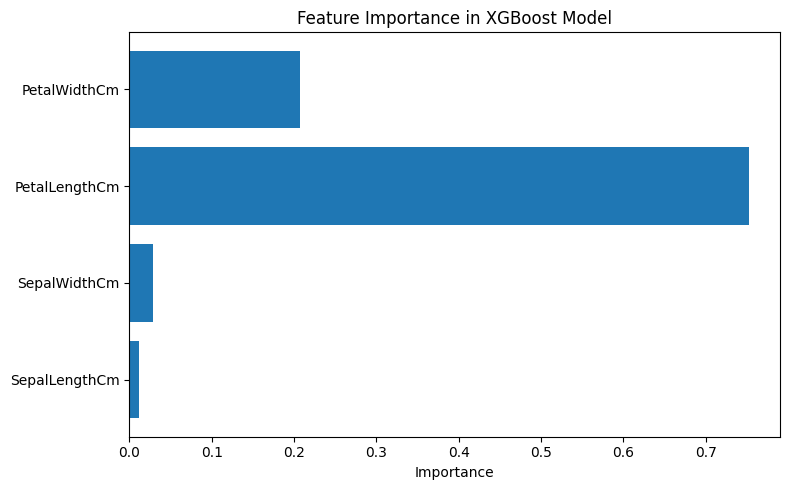

In [19]:
# Visualize feature importance
import matplotlib.pyplot as plt

feature_importance = model.feature_importances_
features = X.columns

plt.figure(figsize=(8, 5))
plt.barh(features, feature_importance)
plt.xlabel('Importance')
plt.title('Feature Importance in XGBoost Model')
plt.tight_layout()
plt.show()

From the above plot, we can see that **PetalLengthCm** is the most important predictor, followed by **PetalWidthCm**, and the remaining two contributing little to the model's predictions. Thus, if we decide to create additional models, or to simplify this one, these two variables should likely remain as predictors.

We'll also want to examine how the model performs on data that it wasn't trained on. Below, we perform inference on the test set that was created previously, and calculate the multiclass accuracy score.

In [20]:
# Make predictions on test set
predictions = model.predict(X_test)

# Evaluate model performance
# Calculate accuracy on both training and test sets
test_accuracy = accuracy_score(y_test, predictions)
train_predictions = model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Training Accuracy: 1.0000
Test Accuracy: 1.0000


The output indicates that the model performed very well during both training and testing. The predictive accuracy of a model can also be visualized with a confusion matrix. It does so by showing how many predictions were correct and incorrect, breaking them down by actual vs. predicted outcomes (True Positives, True Negatives, False Positives, False Negatives) for each class.

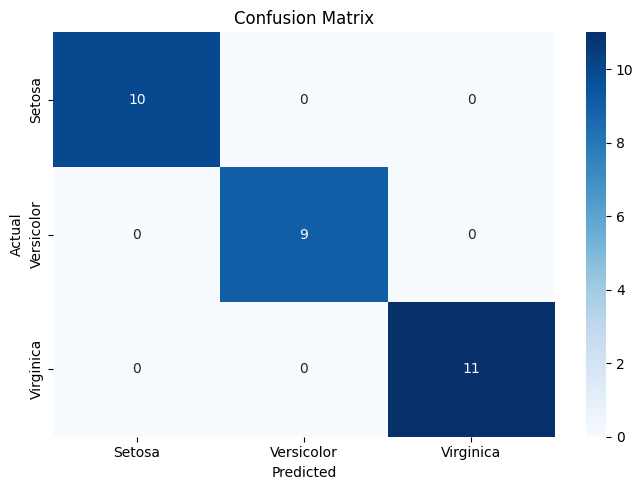

In [22]:
# Confusion matrix to see prediction performance by class
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Setosa', 'Versicolor', 'Virginica'],
            yticklabels=['Setosa', 'Versicolor', 'Virginica'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

The above plot reiterates what our multiclass-classification accuracy implied, which is that the model has perfect accuracy on the test set. However, when this isn't the case, it can be especially useful when try to diagnose whether the model is generally weak, or struggles with specific classes.